# Data Science Assignment 02
## Semester 01, 2020
---

### `Andrew Ellis`

<hr/>

<a id='top'></a>
# Table of Contents

### [Project Goal](#goal)

### [Data Retrieval](#data_ret)

### [Data Preparation](#data_prep)

### [Data Exploration](#data_exp)
- #### [Individual Columns](#exp_indv)
    - [Location](#exp_location)
    - [Date](#exp_date)
    - [iBeacons](#exp_beacons)
- #### [Column Relationships](#exp_rel)
    - [Location and Date](#exp_rel_loc_date)
    - [iBeacon Relationships](#exp_rel_beac)
    - [iBeacon Means over Date Entries](#exp_rel_beac_date)
    - [iBeacon Means over Locations](#exp_rel_beac_location)
- [Overview](#data_exp_ovr)

### [Data Modeling](#data_model)
- #### [Decision Tree Classification](#data_model_tree)
    - [Decision Tree Standard](#data_model_tree_std)
    - [Decision Tree with Parameter Tuning](#data_model_tree_tuned)
- #### [*k* Nearest Neighbour](#data_model_knn)
    - [*k* Nearest Neighbour Standard](#data_model_knn_std)
    - [*k* Nearest Neighbour Parameter Tuning](#data_model_knn_tuned)

<hr/>

In [1]:
# Import of packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime

import warnings
warnings.filterwarnings("ignore")

<a id="goal"></a>
# Project Goal

The ultimate outcome of this project is to create a suitable classification model that will predict a location within a building using the signal strength of specifically placed Bluetooth devices. 

<a id="data_ret"></a>
# Data Retrieval

In [2]:
file = 'dataset/iBeacon_RSSI_Labeled.csv'

df = pd.read_csv(file, delimiter=',')
df.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013
0,O02,10-18-2016 11:15:21,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
1,P01,10-18-2016 11:15:19,-200,-200,-200,-200,-200,-78,-200,-200,-200,-200,-200,-200,-200
2,P01,10-18-2016 11:15:17,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
3,P01,10-18-2016 11:15:15,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200
4,P01,10-18-2016 11:15:13,-200,-200,-200,-200,-200,-77,-200,-200,-200,-200,-200,-200,-200


#### [Return to top](#top)

## Attributes in data set

- `location`: this is the set of coordinates located on the supplied map, A1 being the top-most left, U18 being the most bottom right.
- `date`: Datetime is representend as "mm-dd-yyyy hh:mm:ss"
- `b30{id}`: the remainder of the columns represents an iBeacons Received Signal Strength Indicator (RSSI), each value is represented as a negative number, the closer the number to 0 is the stronger the strength of the signal. *Please note that -200 represents that the iBeacon in* ***out-of-range***

In [3]:
# Size of dataframe
df.shape

(1420, 15)

In [4]:
# Seraching through amount of unique values in the data set

print(f"Dataset Unique Values:\n\n{'Feature':<30}{'Unique Values':>6}\n")
for item in df:
    print(f"{item:<30}{df[item].nunique():>6}")

Dataset Unique Values:

Feature                       Unique Values

location                         105
date                            1420
b3001                             14
b3002                             31
b3003                             32
b3004                             30
b3005                             21
b3006                             24
b3007                             18
b3008                             26
b3009                             21
b3010                             14
b3011                             18
b3012                             19
b3013                             20


- We notice that there are 105 individual coordinate recorded in this data set.
- It should also be noted that iBeacon b3001 and b3010 have the least amount or recordings at only 14 rows.

In [5]:
df.dtypes

location    object
date        object
b3001        int64
b3002        int64
b3003        int64
b3004        int64
b3005        int64
b3006        int64
b3007        int64
b3008        int64
b3009        int64
b3010        int64
b3011        int64
b3012        int64
b3013        int64
dtype: object

- All iBeacon recordings are are integers, whole numbers
- `date` may need more investigation, as it could be considered interval or continuous at this time
- `date`will need to be converted into date time for a more controlled exploration

#### [Return to top](#top)

<a id="data_prep"></a>
# Data Preparation

In [6]:
# Converting object date into a datetime datatype. More control over filtering
df['date'] = pd.to_datetime(df['date'])

In [7]:
df1 = df[df.isna().any(axis=1)]
df1.head()

,location,date,b3001,b3002,b3003,b3004,b3005,b3006,b3007,b3008,b3009,b3010,b3011,b3012,b3013


Searching through out the dataset we can take note that all values have an entry, `NaN` does not exist in this dataset

In [8]:
df['location'].nunique()

105

We notice that there are **105** unique `locations` coordinates in the dataset

#### [Return to top](#top)

<a id="data_exp"></a>
# Data Exploration

<a id='exp_indv'></a>
## Individual Columns

<a id='exp_location'></a>
## Location

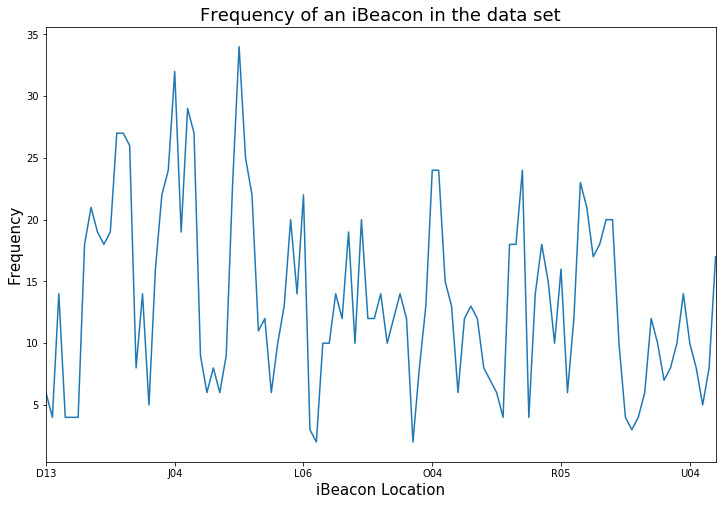

In [9]:
plt.figure(figsize=(12,8))

df['location'].value_counts().sort_index().plot()

plt.rcParams.update({'font.size': 15})
plt.title("Frequency of an iBeacon in the data set")
plt.xlabel('iBeacon Location', fontsize=15)
plt.ylabel('Frequency', fontsize=15)

plt.savefig('images/figure01.png')
plt.show()

### Observations

Above we are searching for the frequency that each **iBeacon** appears in the dataset.

It should be noted the iBeacons on the left half of the graph represent those beacons that are closest to the entrance.

>We could observe here that more activity occurs at the entrance of the building, according to our numbers and the locations be specified on the map near the entrance. *This is however an exception for coordinate `D13` as this coordinates frequency is much lower than its neighbours, and according to the map it seems to be isolated away from the entrance door and to a walled off corner*

#### [Return to top](#top)

<a id='exp_date'></a>
## Date

In [10]:
# Find all unique date entries (dates only, not inclusive of specific times)
date_entries = df['date'].dt.date.unique()
date_entries[::-1].sort() # Sorting helps us better evaluate the timeframe 
  
print(f"\nThe entries span over a period of {(date_entries[0].month - date_entries[-1].month)} months")
print(f"\nThere are {date_entries.shape[0]} days of entries in the dataset")


The entries span over a period of 6 months

There are 11 days of entries in the dataset


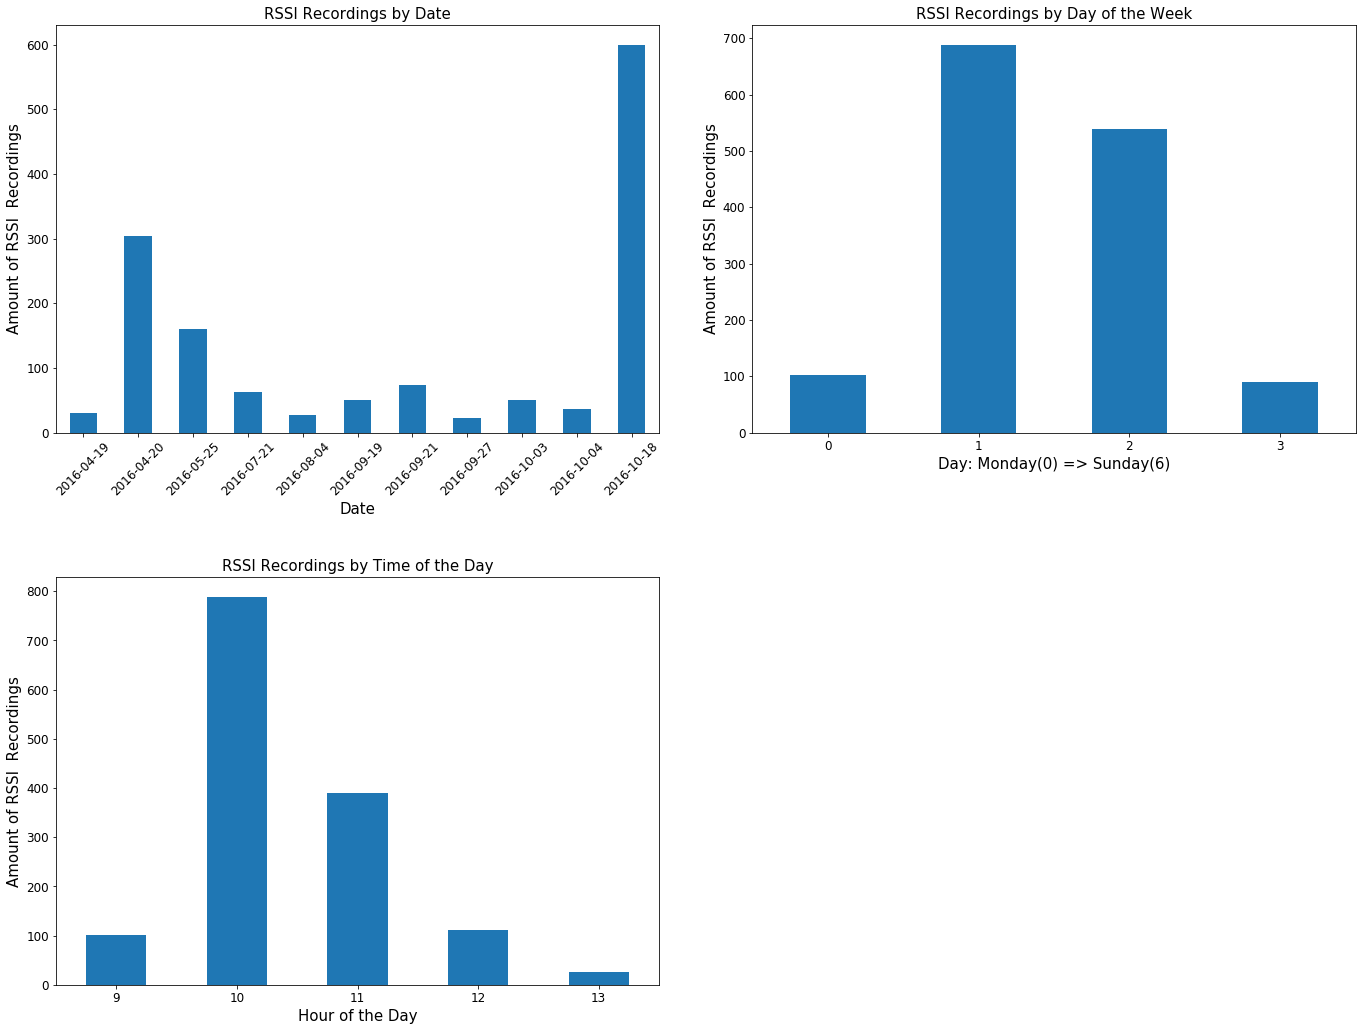

In [11]:
plt.rcParams.update({'font.size': 12})


fig = plt.figure(figsize=(20,15))

ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)

# Look for all recording occurences by date
df['date'].dt.date.value_counts().sort_index().plot(kind='bar', ax=ax1)

ax1.set_title("RSSI Recordings by Date", fontsize=15)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Amount of RSSI  Recordings', fontsize=15)
ax1.tick_params(axis='x', rotation=45)

# Look for all recording occurences by day of the week
df['date'].dt.dayofweek.value_counts().sort_index().plot(kind='bar', ax=ax2)

ax2.set_title("RSSI Recordings by Day of the Week", fontsize=15)
ax2.set_xlabel('Day: Monday(0) => Sunday(6)', fontsize=15)
ax2.set_ylabel('Amount of RSSI  Recordings', fontsize=15)
ax2.tick_params(axis='x', rotation=0)


# Look for all recording occurences by time of the day
df['date'].dt.hour.value_counts().sort_index().plot(kind='bar', ax=ax3)

ax3.set_title("RSSI Recordings by Time of the Day", fontsize=15)
ax3.set_xlabel('Hour of the Day', fontsize=15)
ax3.set_ylabel('Amount of RSSI  Recordings', fontsize=15)
ax3.tick_params(axis='x', rotation=0)


# Clean up spacing format
fig.subplots_adjust(wspace=5, hspace=5)
fig.tight_layout()

fig.savefig('images/figure02.png')

### Observations

`RSSI Recordings by Date`
- `date`s where collection has mostly occured can be found in the **second**, **third** adn **final** date, *more investigation may need to be spent on the **last** collection date, as it is vastly higher than other dates*

`RSSI Recordings by Day of the Week`
- Most collections `date`s have occured on either a **Tuesday** or **Wednesday**. We can note that all collection times have occured at the start of the week, the only recordings that exist are that of **Monday, Tuesday and Wednesday.**

`RSSI Recordings by Time of the Day`
- The majority of all recordings have been taken within two hours before 12pm. We could observe that most collections were started around the 10am mark.

#### [Return to top](#top)

<a id='exp_beacons'></a>
## iBeacons

In [12]:
import math

# Display distribution of all iBeacons from given data
def plot_beacon_dist(data, remove_non_active_beacons=False):

    data_copy = data.copy(deep=True) # Need to create a copy as we are modifiying the dataframe
    
    if remove_non_active_beacons: 
        data_copy.replace(-200, np.nan, inplace=True)
    
    # We want to declare subplot dimensions
    SUBPLOT_COL = 3
    SUBPLOT_ROW = math.ceil(data_copy.shape[1]/SUBPLOT_COL)

    
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(22,20))
    
    # Create an list of axes from given columns
    ax = [None]*data_copy.shape[1]
    
    # We want to set each individual axis to a subplot
    for i in range(len(ax)):
        ax[i] = fig.add_subplot(SUBPLOT_ROW, SUBPLOT_COL, i+1)
        
    
    # Create histograph for each given column
    for i, item in enumerate(data_copy):
        data_copy[item].hist(ax=ax[i])
        
        ax[i].set_title(f"iBeacon b3 {i+1}: Distribution of RSSI Signal Strength", fontsize=15)
        ax[i].set_xlabel('iBeacon', fontsize=15)
        ax[i].set_ylabel('RSSI Count', fontsize=15)
    
    
    # Clean up spacing format
    fig.subplots_adjust(wspace=5, hspace=10)
    fig.tight_layout()

    if remove_non_active_beacons:
        fig.savefig('images/figure03A.png')
    else:
        fig.savefig('images/figure03.png')

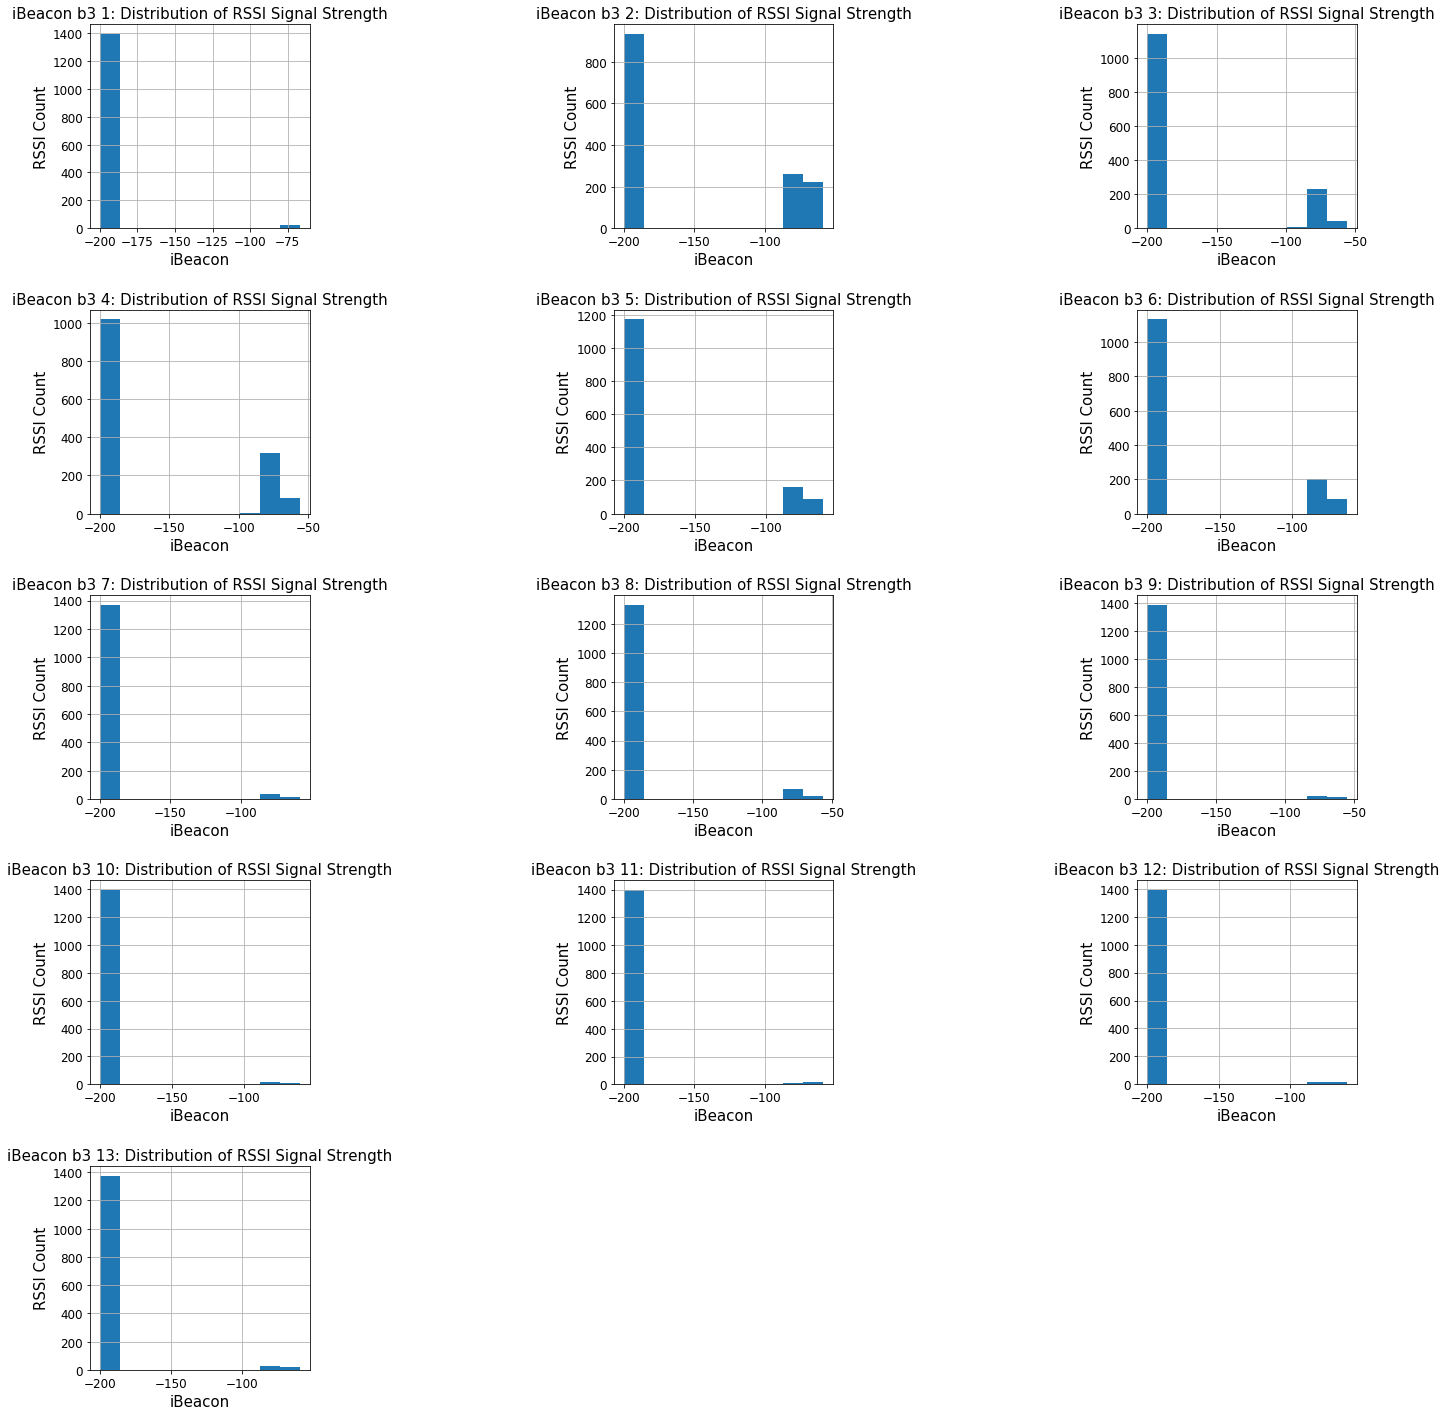

In [13]:
plot_beacon_dist(df.iloc[:, 2:15])

### Observations

- It can be seen that iBeacon number `002 - 006` have the most amount of activity recorded in the data set. This is a similar distribution as the location in *figure 01*. 


- iBeacons `002 - 006` are a situated on the map next door to each other and towards the entrance of the building. 
>*Again we can observe that there is more activity located towards the entrance of the building*. 


- We can also observe that `iBeacon 008` has a low activity, yet is located towards the entrance of the library, *this could suggest that there is either no items of interaction or desk space in this zone, or the foyer near `iBeacon b0001` directs attention more significantly to the east bound entrance on the map (towards `iBeacon b0005 & b0008`) rather than the south bound entrance which heads towards `iBeacon b0009`*.


- Another observation we can make is of the graphs that represent `iBeacon b0009, ..10, ..11, ..12 and ..13`. All these beacons show low activity compared to all others. If we observe the map we can see that all these `iBeacons` are isolated away from the larger space on the north end of the map, seperated by structures/rooms. It may be that these lower valued beacons represent a much less popular shared space in the library.

#### [Return to top](#top)

### Replacing inactive `iBeacons` -200 with NaN

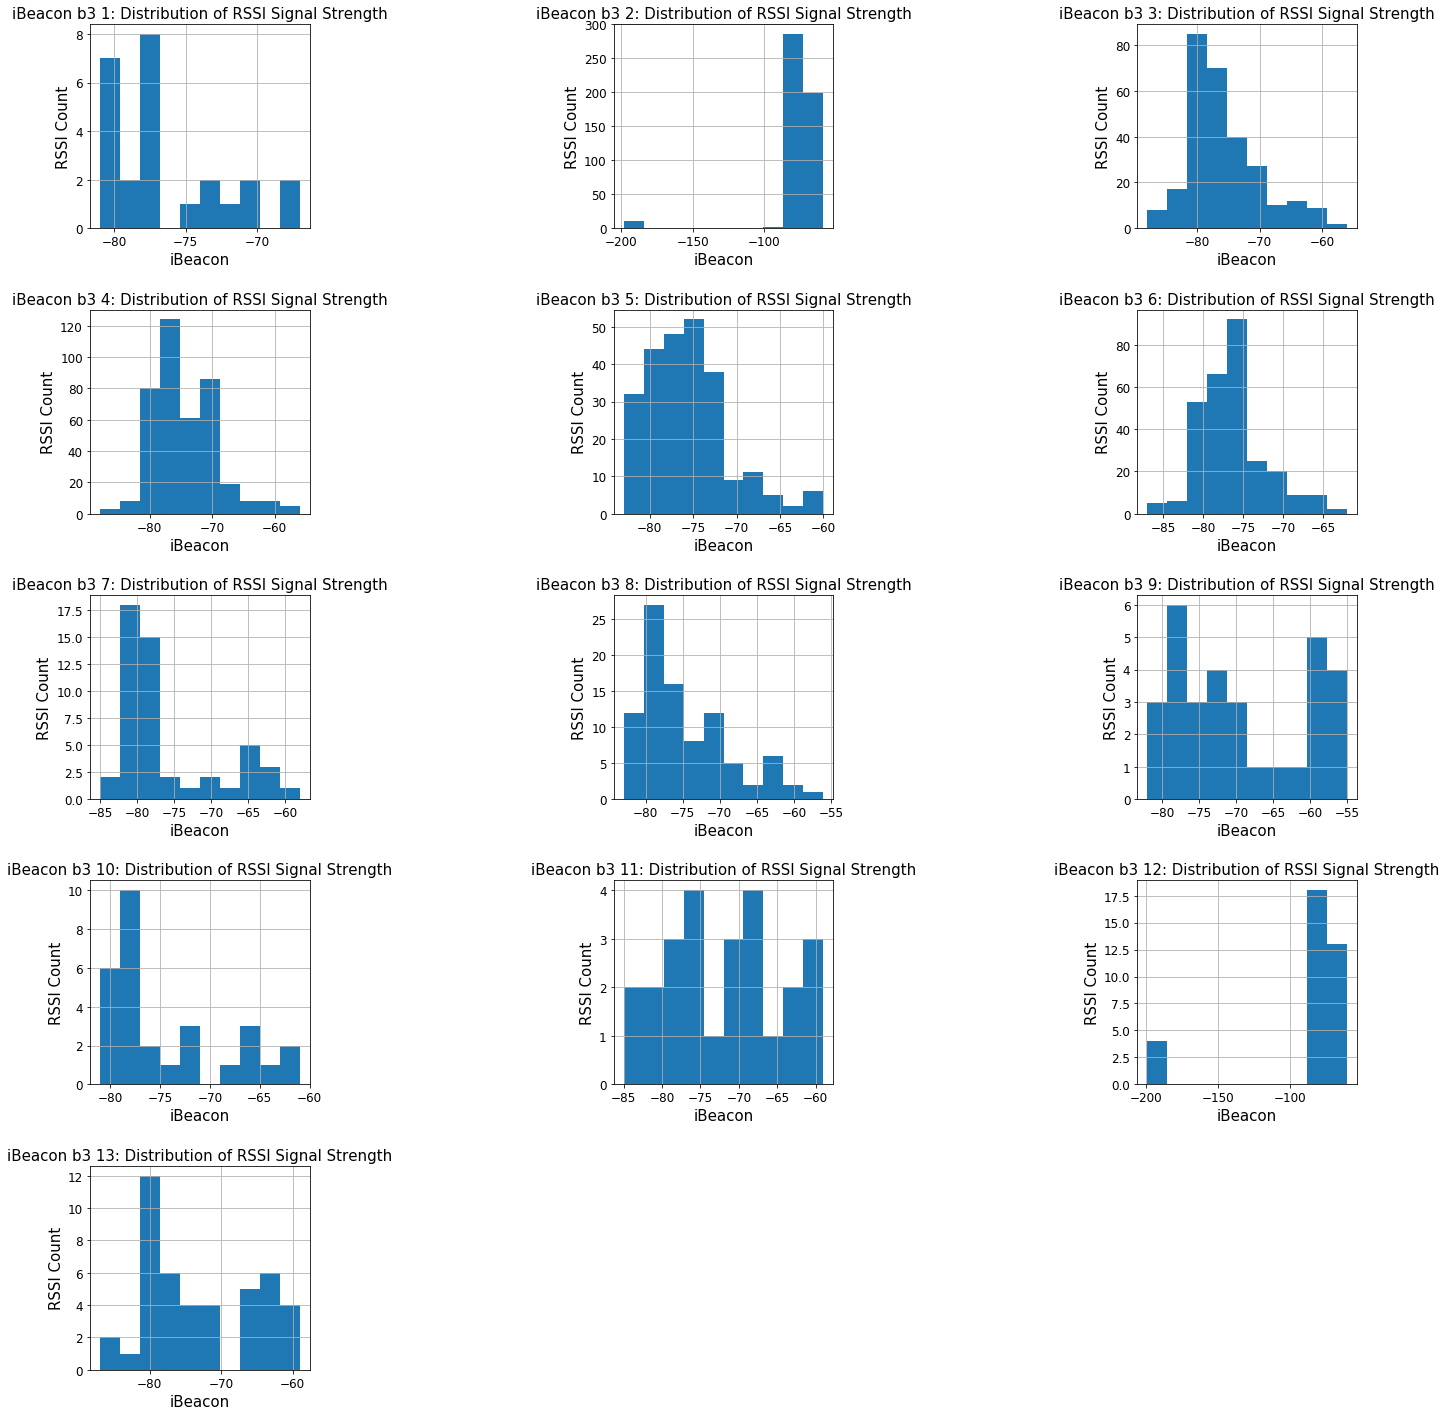

In [14]:
plot_beacon_dist(df.iloc[:, 2:15], True)

### Observations

*As the dataframe temporarily replaces all non-active beacons '-200' with `NaN` we can better see the beacons RSSI activity.*


- We can now notice that `iBeacons b3003, ..4, ..5, ..6 and ..11` show the closest resemblence of a normal distribution. This could be attributed to being the most central beacons located on the map, more so that they are mostly always in contact distance with the collection device.


- An interesting observation is seen in `iBeacon b3012` where we notice that the RSSI signal that does get collected is either somewhat weak or extremely strong, no middle ground. We could derive that being the most distance beacon it is either targeted or avoided and never just passed by, this makes better sense observing the map and the room that sits between the beacon and the majority of all other beacons.


- Another observation can be made on `iBeacon b3005, ...9 and ..11`, theses three beacons show a much more consistent distribution of RSSI activity over all db level. These beacons all have locations at *entry points*, `5` is the main east bound entrance, `9` is the main south bound entrance while `11` can be seen as the entry/exit point to beacon `12` and `13`. This would support a reason as to why they are more active across all RSSI levels than other beacons

#### [Return to top](#top)

<a id='exp_rel'></a>
## Column Relationships

<a id='exp_rel_loc_date'></a>
### Location and Date

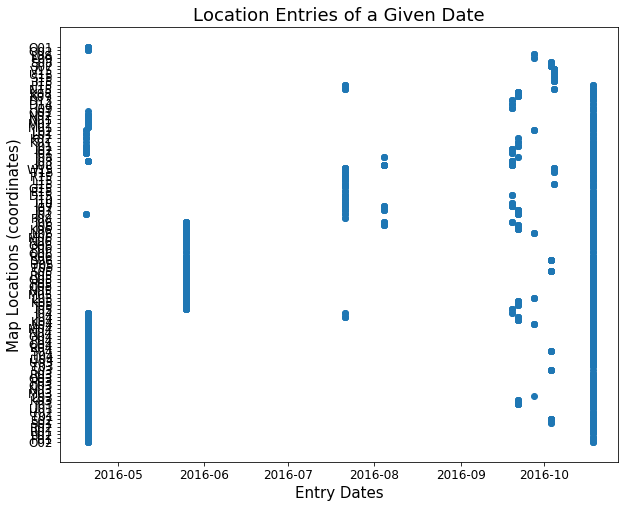

In [15]:
plt.figure(figsize=(10,8))

plt.plot_date(x=df['date'], y=df['location'], )

plt.rcParams.update({'font.size': 15})
plt.title("Location Entries of a Given Date")
plt.xlabel('Entry Dates', fontsize=15)
plt.ylabel("Map Locations (coordinates)", fontsize=15)


plt.savefig('images/figure04.png')
plt.show()

Hypothesis 1
---

- The above figure shows location points entered in a given day over the course of the project. 


- It can be noticed that the most heavy traffic and surface covered belongs on the last date of entry and the first date. 

- It is also visible that more collection occured around the last month of October, as there are about six different dates that occur.


- Additionally in the middle months of the project far less coordinates were recorded.

#### Hypothesis 1
>- It could be hypothesised that the last and first date of the project may have had more time spent at the locations.
- This could also lead to a hypothesis that due to the middle collection dates being scarce of *all ground covered* the researchers took action in the last month to cover more and all ground inside the library.

In [16]:
def plot_location_time(data):

    # We want to declare subplot dimensions
    SUBPLOT_COL = 2
    SUBPLOT_ROW = math.ceil(data.shape[1]/SUBPLOT_COL)
    
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(28,90))
    
    # Create a list of all unique dates in the dataset
    collection_dates = data['date'].dt.date.unique()
    collection_dates.sort()
    
    # Create a list of all axis needed for subplots
    ax = [None]*len(collection_dates)
    
    # We want to set each individual axis to a subplot
    for i in range(len(ax)):
        ax[i] = fig.add_subplot(SUBPLOT_ROW, SUBPLOT_COL, i+1)

    
    for i, item in enumerate(collection_dates):
        # Create a data frame of all entries given a unique date
        unique_date = data[data['date'].dt.date == item]
        unique_date.reset_index(drop=True, inplace=True)
        
        ax[i].plot_date(x=unique_date['date'].dt.time, y=unique_date['location'])
        
        ax[i].set_title(f"Location Recordings for the {item}", fontsize=15)
        ax[i].set_xlabel('Time of Day', fontsize=15)
        ax[i].set_ylabel('Location', fontsize=15)
    
        
    # Clean up spacing format
    fig.subplots_adjust(wspace=5, hspace=15)
    fig.tight_layout()

    fig.savefig('images/figure05.png')

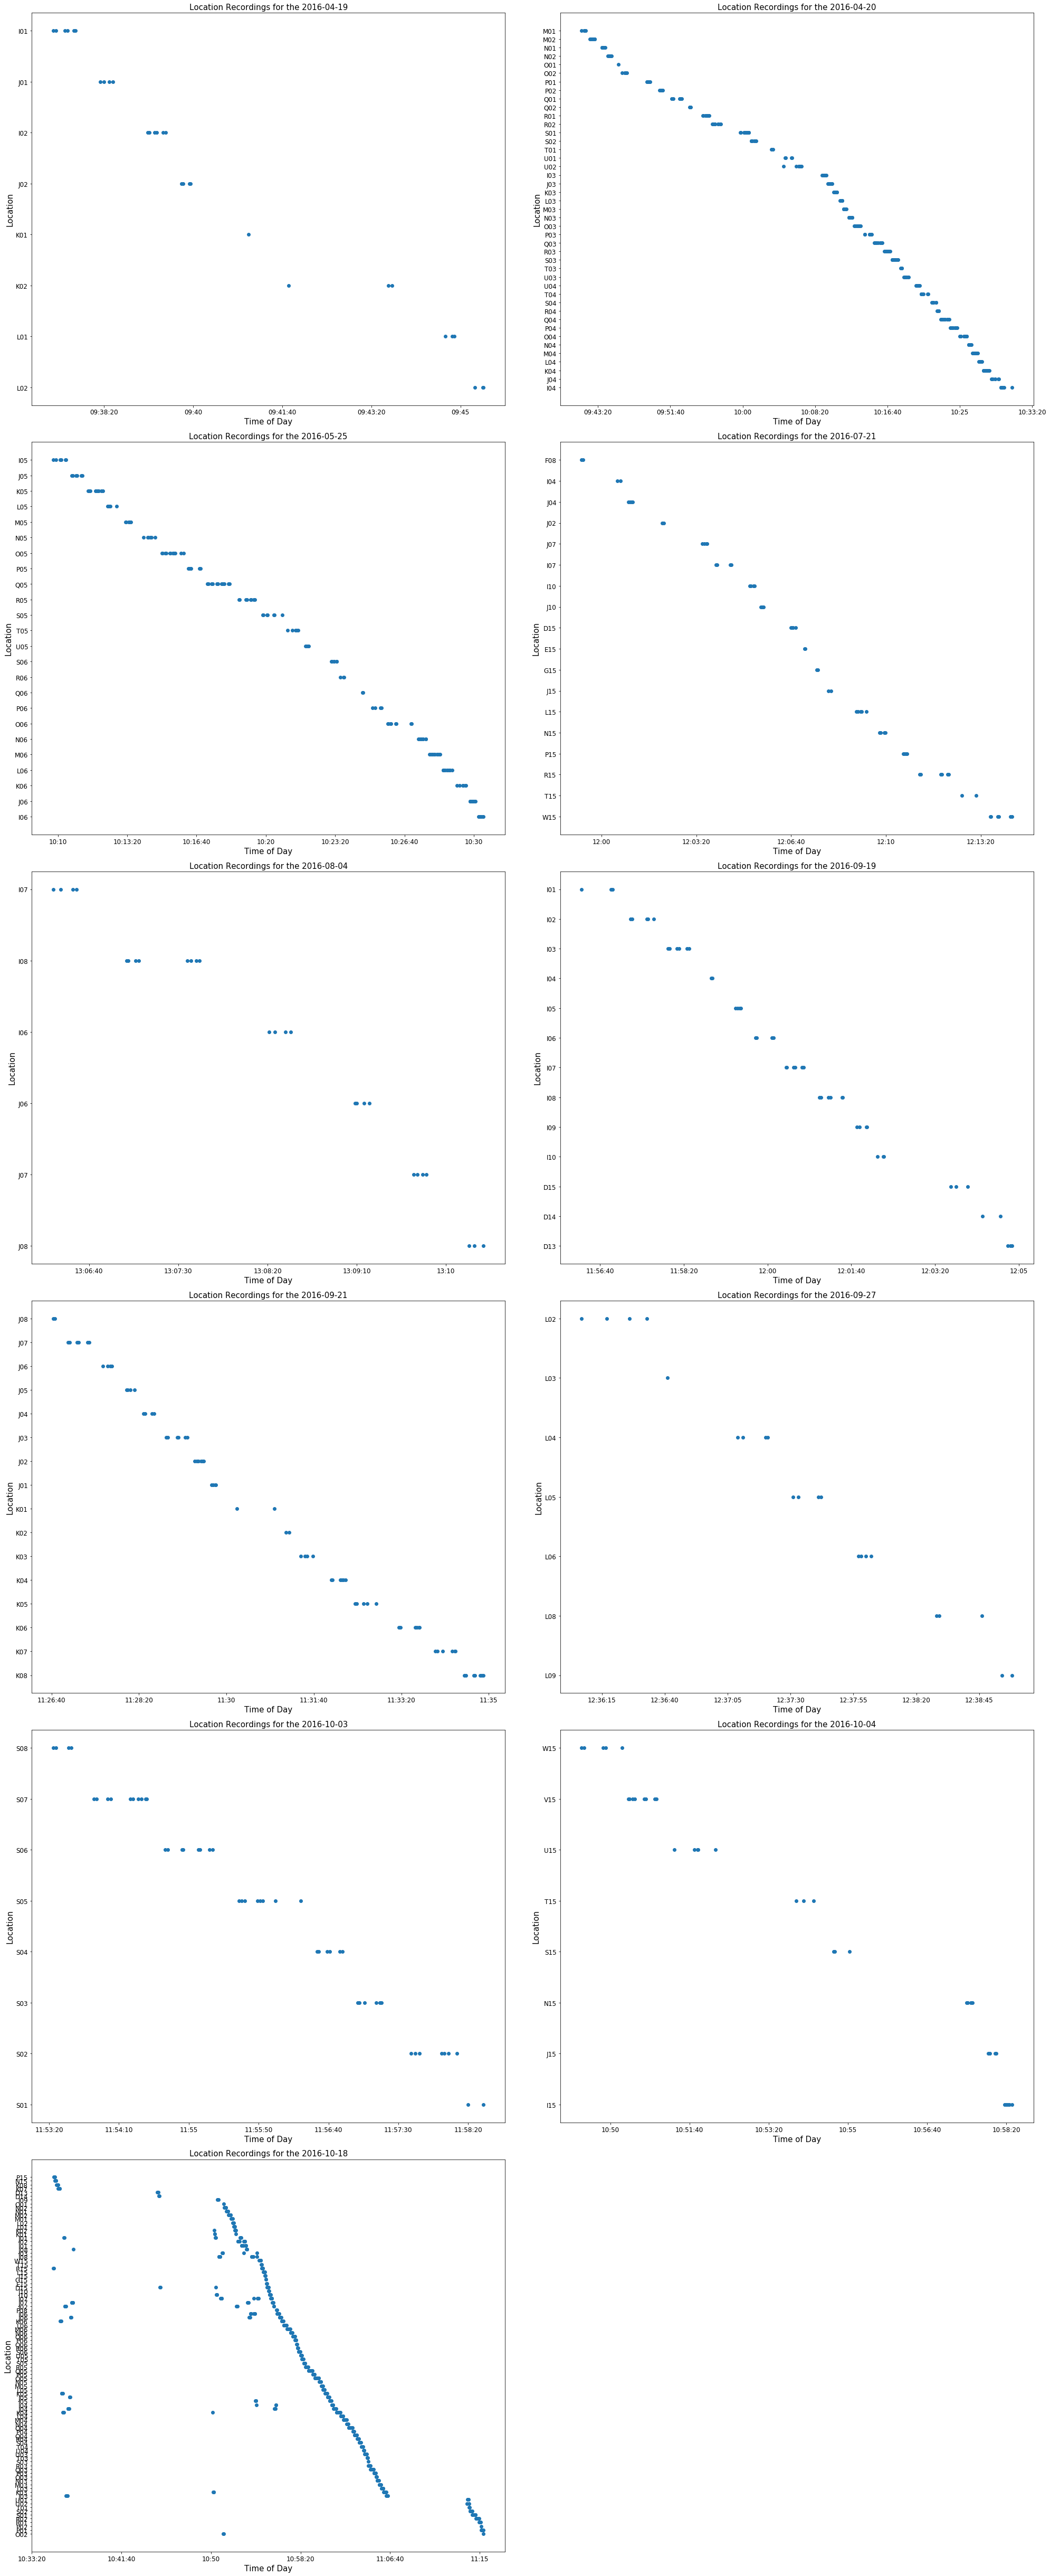

In [17]:
plot_location_time(df)

Hypothesis 2-4
---

- Each graph represents one of the 11 days recorded in the experiment

- There is a noticible negative linear relationship found here between the time of day and the location signaled. 


- We see that the RSSI signals reinforce the relationship between time travelled between coordinates on the map.


- Additionally it can be noted that the experiment shows clean functionality as each step over time is recoded with a connected coordinate plot on the y-axis. 


- It can also be seen that a greater amount of time was spent on location when more coordinates weere captured on the y-axis, as seen on `2016-10-18` where approximately 45 minutes was spent at the library, we can see a much large amount of entries. As opposed to `2016-08-04` where the least amount of entries are recorded in a time span of about 5 minutes spent at the library.


#### Hypothesis 2
>For the first 10 days recorded we can see a clear and concise path taken by the researcher, however on the last day (11, `2016-10-18`), we see a sporadic path with many more coordinates activated on the y-axis. **A hypothesis here is that on the last day of collection the researcher covered more ground than any other day, including back tracking (non-linear paths)**


#### Hypothesis 3
>We can hypothesise that on the last day of collection `2016-10-18` the researcher made a concious decision to take random paths and more repetitive behaviour to collect different behaviour than previous days.


#### Hypothesis 4
>Another hypothesis is that the larger the white space is between data points the more time is spent at a given coordinate.

#### [Return to top](#top)

<a id='exp_rel_beac'></a>
## iBeacon Relationships

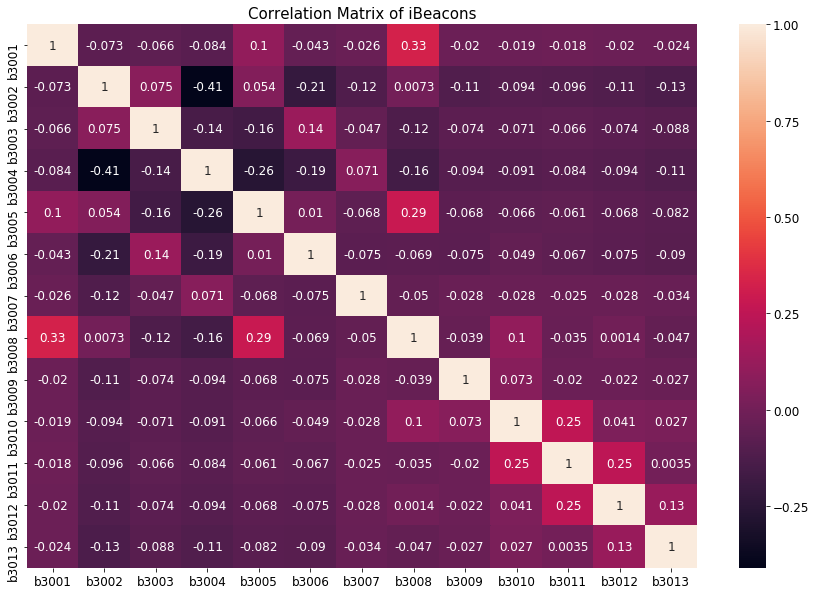

In [18]:
import seaborn as sn

ax = plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 12})

ax = sn.heatmap(df.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5) # Must re align the y-axis to be centred


ax.set_title("Correlation Matrix of iBeacons", fontsize=15)

plt.savefig('images/figure06.png')
plt.show()




Hypothesis 5-7
---

- It can be seen that most of all the iBeacons would show high correlation in behaviour when using our given map as a guide, as such iBeacons that have been placed next to each other show much higher correlation than those set further apart. *Case of `b3002` and `b3001` which show a lower value of **-0.073** while both `b3002` and `b3001` reflect higher values with `b3005`, (**0.1 and 0.054**) which is a connection point between the both.*

#### Hypothesis 5
>A general hypothesis here is that any value shown on the correlation matrix to be **n > 0** we can assume that the two iBeacons are neighbours to each other.


- We can see a higher correlation between `b3001` and `b3008` than we see in `b3001` and `b3005` even though on the map they appear to be a similar distance from one another. We may hypothesise that is is more encouraging or convenient to head in a right direction as one first enters through the building.

#### Hypothesis 6
>We can hypothesise with the given data collected that there is a consistent behaviour to travel left as the subject enters into the building from the east bound entrance, suggesting that the researcher(s) had a bias in path making from the north-west side of the library, this could be due to more open space.

#### Hypothesis 7
>It could be hypothesised that the east bound entrance is far more utilised than the south bound entrance. This is due to a noticeable  difference in the correlation between iBeacons `b3001` -> `b3008` and `b3001` -> `b3009`. Where iBeacons `b3001` -> `b3008` has the much higher value of correlation. 

#### [Return to top](#top)

<a id="exp_rel_beac_date"></a>
## iBeacon Means over Date Entries

In [19]:
def plot_beacon_time(data, data_columns):

    # We want to declare subplot dimensions
    SUBPLOT_COL = 3
    SUBPLOT_ROW = math.ceil(data_columns.shape[1]/SUBPLOT_COL)
    
    plt.rcParams.update({'font.size': 12})
    fig = plt.figure(figsize=(28,40)) 
    
    # Create a list of all unique dates in the dataset
    collection_dates = data['date'].dt.date.unique()
    collection_dates.sort()
    
    # Create a list of all axis needed for subplots
    ax = [None]*len(collection_dates)
    
    # We want to set each individual axis to a subplot
    for i in range(len(ax)):
        ax[i] = fig.add_subplot(SUBPLOT_ROW, SUBPLOT_COL, i+1)

    for i in range(len(collection_dates)): # Loop through all unique entry dates
        bcn_u = dict() # Need to store means of each beacon into a dictionary
        
        # Create a data frame of just rows associated with the unique date
        single_date_data = data[data['date'].dt.date == collection_dates[i]]
        for k, item in enumerate(data_columns):            
            # Collect all beacon means of a given date
            bcn_u[item] = single_date_data[item].mean()
    
        ax[i].bar(range(len(bcn_u)), list(bcn_u.values()), align='center')
        ax[i].set_xticks(range(len(bcn_u)), list(bcn_u.keys()))
        
        ax[i].set_title(f"iBeacon Means for {collection_dates[i]}", fontsize=15)
        ax[i].set_xlabel('iBeacon number', fontsize=15)
        ax[i].set_ylabel('Mean', fontsize=15)
       
        
    # Clean up spacing format
    fig.subplots_adjust(wspace=5, hspace=15)
    fig.tight_layout()

    fig.savefig('images/figure07.png')

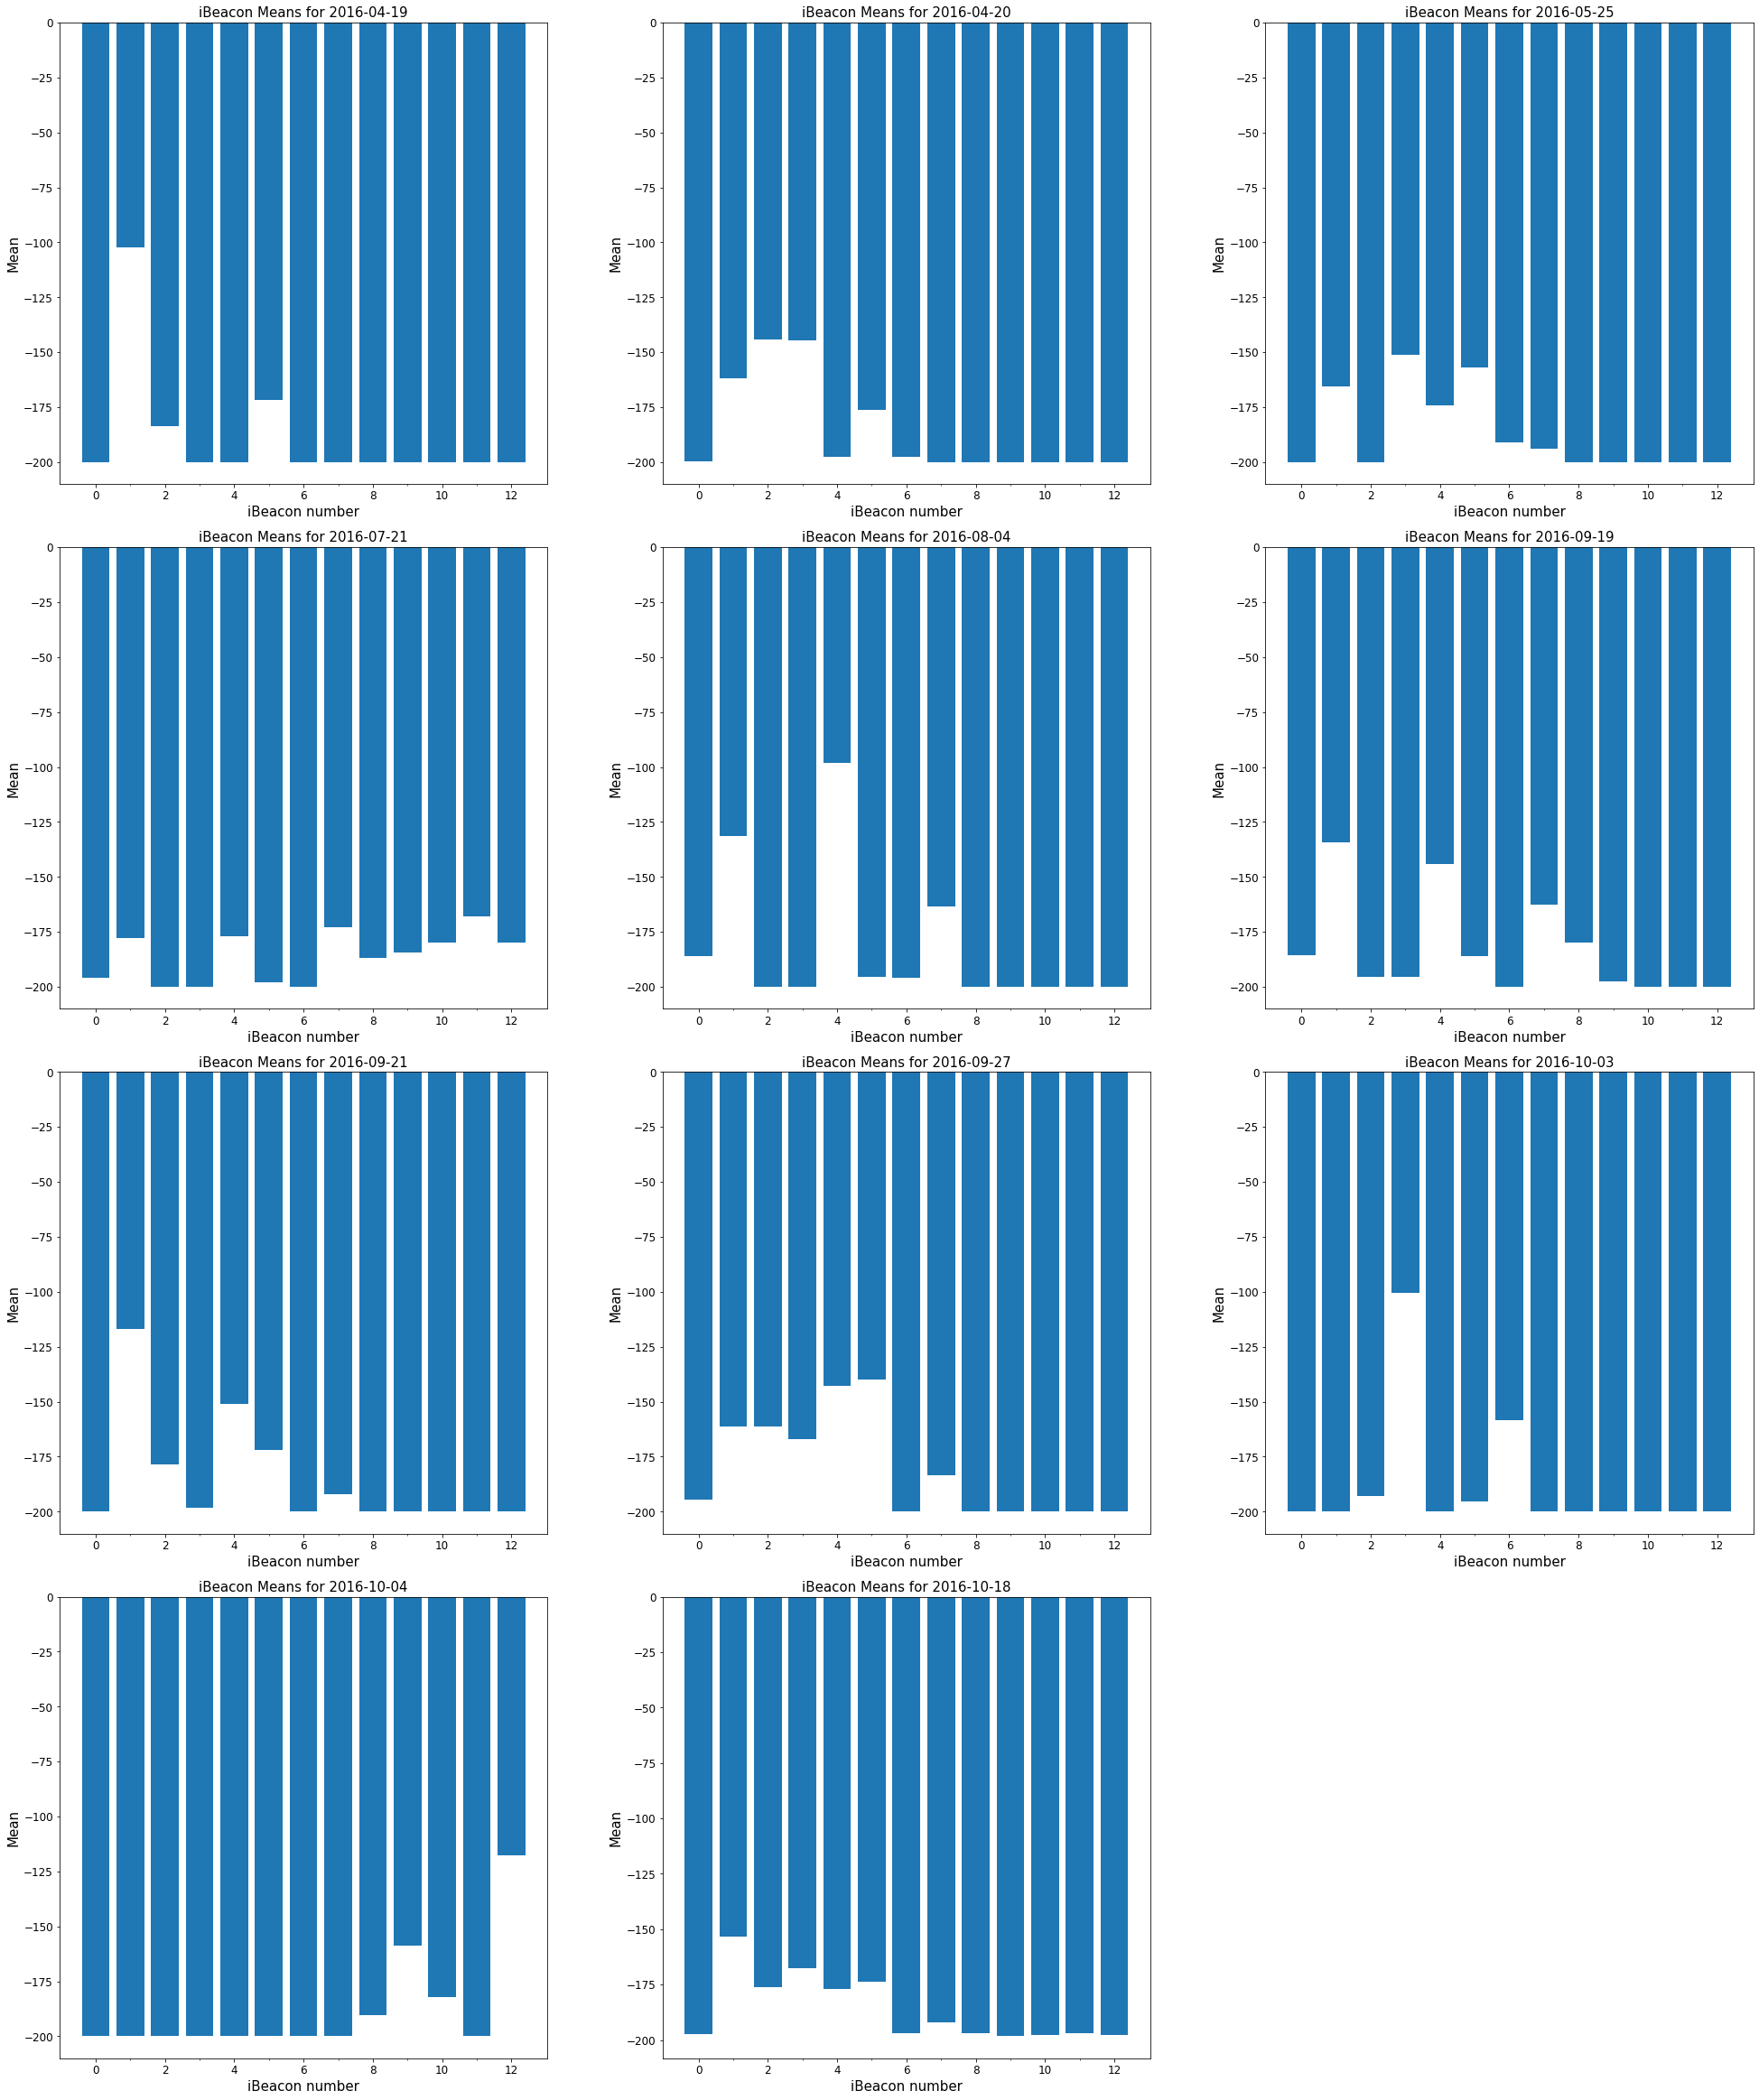

In [20]:
# Send data frame with range of column locations
plot_beacon_time(df, df.iloc[:,2:16])

Hypothesis 8 and 9
---

- Looking through the relastionship between iBeacons and the date entries over a single day, it can be noticed not all iBeacons show interaction in a given day. 

#### Hypothesis 8
>One hypothesis could be that on average the researcher only navigated part of the library at a time, and that with the exception for date `2016-10-04` most data points of RSSI activity came from only beacons below `iBeacon` 10. *This could translate that the reseacher(s) spent a small amount of time and the furthest point on the map from the entrance of the building*


- The only date to show all `iBeacons` with activity was `2016-10-18`.

#### Hypothesis 9
>The hypothesis is that the researcher(s) intentionally only activated *all beacons* on the last day of data collection due to previous dates without a similar breadth.

#### [Return to top](#top)

<a id="exp_rel_beac_location"></a>
## Beacon Means over Locations

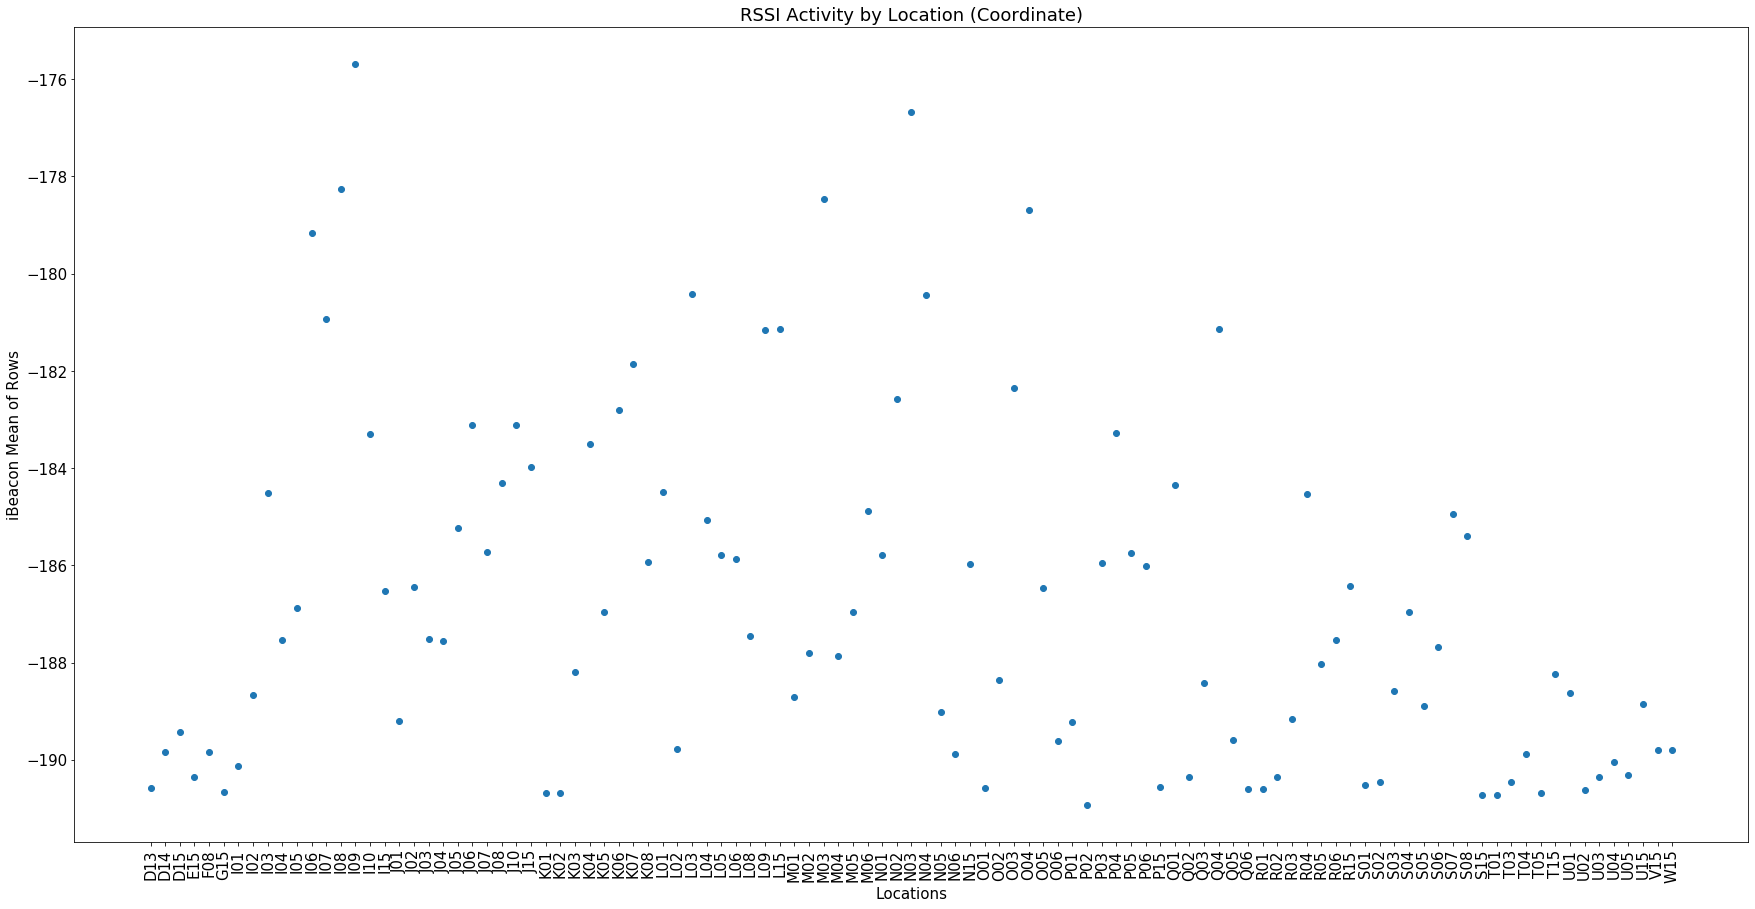

In [21]:
# Add a new 'mean' column to the data frame
df['mean'] = df.iloc[:,2:16].mean(axis=1) # The new column is the mean of all RSSI in the row
unique_locations = df['location'].unique() # Create a list of all unique coordinates ('location')

plt.figure(figsize=(30,15))
plt.rcParams.update({'font.size': 15})

location_activity = dict()
for i, item in enumerate(unique_locations):
    df_location = df[df['location'] == item]
    location_activity[item] = df_location['mean'].mean() # Gather a mean of all means from a unique location

#Sort the dictionary so we can display all locations alphabetically
sorted_location = dict(sorted(location_activity.items(), key=lambda x: x[0], reverse=False))
    
# Create a scatter plot of means against location
plt.scatter(x=sorted_location.keys() , y=sorted_location.values())
plt.tick_params(axis='x', rotation=90)


plt.title("RSSI Activity by Location (Coordinate)")
plt.xlabel('Locations', fontsize=15)
plt.ylabel('iBeacon Mean of Rows', fontsize=15)

plt.savefig('images/figure08.png')

plt.show()

Hypothesis 10 - 12
---

- It can be noticed that the highest activity on the map is situated between `M` and `N`, additionally `I` has heavy activity as well. Otherwise the lowest activity tends to be situated at the tails of both left and right.


- Looking at the map we can see `I`, `M` and `N` are all located toward the entrance of the building. 

#### Hypothesis 10
>Reinforcing previous hypothesis that higher volume of researcher traffic at the entrance led to more activation of `iBeacon` RSSI strength in the west-most beacons


- Location `N` -> `W` show a negative linear relationship of beacon strength

#### Hypothesis 11
>The researcher(2) spent less and less time towards the east-most (back) of the library


- Location `D` -> `G` show low overall beacon activity

#### Hypothesis 12
>Due to these coordinates being an entry point into the building foyer, time spent at these locations by the researcher(s) is minimal and could be hypothesised that the foyer was never revisited in the path, other than entry/exit.

#### [Return to top](#top)

<a id="data_model"></a>
# Modeling

In [22]:
'''
The dataset now needs to be split into a target label and feature labels,
at this point I will not be including 'date' into the features as we are aiming
to predict location given RSSI feeds.
''' 

overall_scores = dict() # Create a dictionary to plot all model performances at the end

target_label = df['location'][:]
features = df.drop(['date', 'location', 'mean'], axis=1) # we only want to use beacons as our features

print(f"target size: {target_label.shape[0]} - feature size: {features.shape[0]}")

target size: 1420 - feature size: 1420


<a id="data_model_tree"></a>
## Decision Tree Classifier

<a id="data_model_tree_std"></a>
### Decision Tree Standard

In [23]:
from sklearn.model_selection import train_test_split

# Creating a testing set
X_train, X_val, y_train, y_val = train_test_split(features,target_label, test_size=0.2, random_state=0 )

# Creating a validation set
X_val, X_test, y_val,y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=0)

All proceeding `train_test_split` will follow the same principles:
- Training:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.80
- Validation:&nbsp;&nbsp;0.16
- Testing:&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.04

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

clf = DecisionTreeClassifier() #Creating a simple baseline DecisionTreeClassifier
fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_val)

score = metrics.accuracy_score(y_val,y_pred)

overall_scores['DecisionTree std'] = score

print(f"Accuracy Score: {score}")

Accuracy Score: 0.31277533039647576


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         D13       0.00      0.00      0.00         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.33      0.50         3
         E15       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.14      0.50      0.22         2
         I02       0.14      0.17      0.15         6
         I03       0.25      0.25      0.25         4
         I04       0.17      0.50      0.25         2
         I05       0.00      0.00      0.00         4
         I06       0.33      0.33      0.33         3
         I07       0.17      0.33      0.22         3
         I08       0.50      0.75      0.60         8
         I09       1.00      1.00      1.00         3
         I10       0.75      1.00      0.86         3
         I15       0.00      0.00      0.00         1
         J01       0.00      0.00      0.00         2
         J02       0.00    

#### Notes:

From the above `classification_report` we can see that there is a lot of missing values from some `locations` this may be due to the smaller size of the data set, or the sparcity of beacon activity.

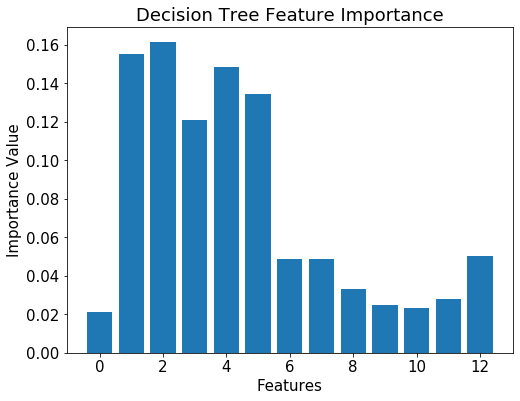

In [26]:
# Collect Feature Importance from the DecisionTreeClassifier output
importance = clf.feature_importances_

# plot feature importance
plt.figure(figsize=(8,6))

plt.bar([x for x in range(len(importance))], importance)

plt.title('Decision Tree Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Value')

plt.savefig('images/figure09.png')

plt.show()

<a id="data_model_tree_tuned"></a>
### Decision Tree with Parameter Tuning

In [27]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

#### Notes on Feature Scaling:

Knowing that the data set contains '-200' as a value that signifies a beacons inactivity, I though it may be overwhelming for feature importance, as such I incorporated a `StandardScaler` to allow for the overall values to fall into a normalised distribution.

In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'criterion':('gini', 'entropy'), 'max_depth':np.arange(1,25), 'max_features':range(1, 13)}

tree = GridSearchCV(DecisionTreeClassifier(), parameters) # Inserting Tree Classifier with new params

tree.fit(X_train,y_train) # Fitting to the training split

tree.best_params_

{'criterion': 'entropy', 'max_depth': 14, 'max_features': 2}

#### Notes on Parameter Tuning:

I utilised the power of `GridSearchCV` to iterrate through multiple parameters to help influence a better tuning solution.

In [29]:
print(f"GridSearchCV Score for DecisonTreeClassifier: {tree.score(X_val,y_val)}")

GridSearchCV Score for DecisonTreeClassifier: 0.2775330396475771


#### Notes on Decision Tree Performance with Parameter Tuning

We can see a marginally better score than previous, we can assume a boost mostlikely came from the scaling of the data values.

In [30]:
# Create Decision Tree classifer model
clf = DecisionTreeClassifier(criterion="entropy", max_features=8, max_depth=24)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

score = metrics.accuracy_score(y_test,y_pred)

overall_scores['DecisionTree params'] = score

# Model Accuracy
print(f"Accuracy Score: {score}")

Accuracy Score: 0.2982456140350877


#### Notes on Decision Tree Performance:

The above is evaluating the models performance using parameters given by `GridSearchCV` using the *test* spit of the original `test_train_split`

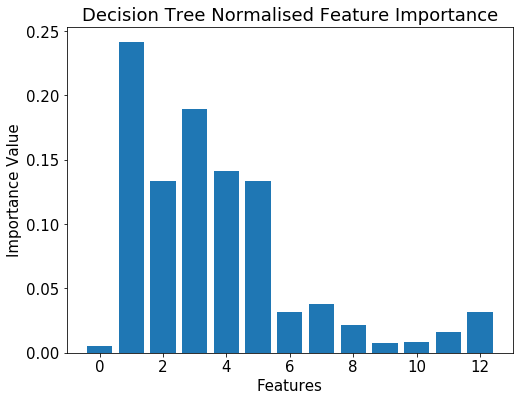

In [31]:
# Collect Feature Importance from the DecisionTreeClassifier output
importance = clf.feature_importances_

# plot feature importance
plt.figure(figsize=(8,6))

plt.bar([x for x in range(len(importance))], importance)

plt.title('Decision Tree Normalised Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Value')

plt.savefig('images/figure10.png')

plt.show()

<a id="data_model_knn"></a>
## *k* Nearest Neighbour Classifier

<a id="data_model_knn_std"></a>
### *k* Nearest Neighbour Standard

In [32]:
# Creating a testing set
X_train, X_val, y_train, y_val = train_test_split(features,target_label, test_size=0.2, random_state=0 )

# Creating a validation set
X_val, X_test, y_val,y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

clf = KNeighborsClassifier(5) #Basic knn Classifier with default parameter 5 k_neighbours
fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_val)

In [34]:
# Scorring the model
score = metrics.accuracy_score(y_val,y_pred)

overall_scores['KNeighbourClassifier std'] = score

print(f"Accuracy Score: {score}")

Accuracy Score: 0.23788546255506607


#### Notes on Performance:

We can see a much lower model performance only using the basic default for *k* Nearest Neighbour

In [35]:
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

         D13       0.25      1.00      0.40         1
         D14       0.00      0.00      0.00         1
         D15       1.00      0.33      0.50         3
         F08       0.00      0.00      0.00         0
         G15       1.00      1.00      1.00         1
         I01       0.11      0.50      0.18         2
         I02       0.20      0.33      0.25         6
         I03       0.00      0.00      0.00         4
         I04       0.00      0.00      0.00         2
         I05       0.00      0.00      0.00         4
         I06       0.38      1.00      0.55         3
         I07       0.00      0.00      0.00         3
         I08       0.33      0.25      0.29         8
         I09       0.00      0.00      0.00         3
         I10       0.33      0.67      0.44         3
         I15       0.50      1.00      0.67         1
         J01       0.00      0.00      0.00         2
         J02       0.00    

<a id="data_model_knn_tuned"></a>
### *k* Nearest Neighbour Parameter Tuning

In [36]:
# A simple plotting method that has additional tuning inside to reflect reccomendations from GridSearchCV
def plot_knn_accuracy(X_train, y_train, fig_number, params=None):

    # k range to test
    k_range = range(1, 26)

    scores = []
    for k in k_range:
        
        if  params is None:
            knn = KNeighborsClassifier(n_neighbors=k)
        
        else:
            knn = KNeighborsClassifier(
                algorithm=params['algorithm'], 
                n_neighbors=k, 
                p=params['p'], 
                weights=params['weights'])

        
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_val)
        scores.append(metrics.accuracy_score(y_val, y_pred))

    # accuracy and K number
    plt.figure(figsize=(8,6))

    plt.plot(k_range, scores)
    
    plt.title('kNN Accuracy over k number')
    plt.xlabel('kNN (k)')
    plt.ylabel('Accuracy')

    plt.savefig(f"images/figure{fig_number}.png")

    plt.show()

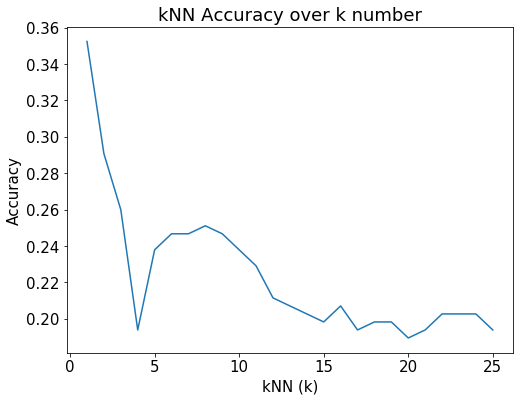

In [37]:
plot_knn_accuracy(X_train, y_train, '11') # Plot for basic KNN

#### Notes on basic KNN Accuracy:

The peak of accuracy is towads the start of our k values, optimum being 2. As we move further in time we see dramatic decline in accuracy then a move into a more steady decline of accuracy.The larger fluctuations may be coming from the training set with a heavy influence from the inactive '-200' value

In [38]:
# Broad arrange of parameters for the given KNN algorithm
parameters = {
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 
    'weights': ('uniform', 'distance'), 
    'n_neighbors': [2,3,5,8,11],
    'p': [1, 2]
    }

knn = GridSearchCV(KNeighborsClassifier(), parameters)

knn.fit(X_train,y_train)

params = knn.best_params_
params

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'}

#### Note:

Again this is the parameter recommnedations from GridSearchCV

In [39]:
print(f"GridSearchCV Score for KNeighborsClassifier: {knn.score(X_val,y_val)}")

GridSearchCV Score for KNeighborsClassifier: 0.3524229074889868


In [40]:
# Feature scaling
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

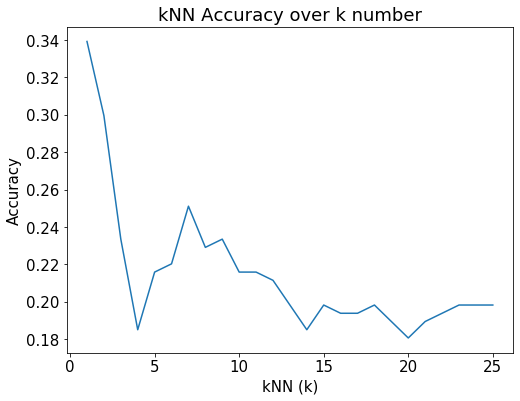

In [41]:
plot_knn_accuracy(X_train, y_train, '12') #Basic Parameters for KNN, with normalisation

#### Notes:

We can see that from just normalising the training set split that the lines progress still follows form, however it shows much more refinement than previously seen.

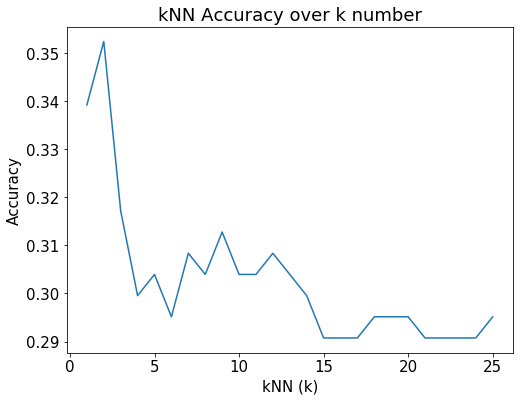

In [42]:
plot_knn_accuracy(X_train, y_train, '11', knn.best_params_) # Plotting KNN with given prameters, based off GridSearchCV

#### Notes:

We can now see a muchh more refined accuracy with an actuall progress at the start, the overall performance is an improvement, however this much lower than is desired. 

In [43]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# clf = KNeighborsClassifier(algorithm='ball_tree', n_neighbors=2 weights='distance')
clf = KNeighborsClassifier(
                            algorithm=params['algorithm'], 
                            n_neighbors=params['n_neighbors'], 
                            p=params['p'],
                            weights=params['weights'])

fit = clf.fit(X_train, y_train)

y_pred = fit.predict(X_val)

In [44]:
score = metrics.accuracy_score(y_val,y_pred)

overall_scores['KNeighbourClassifier with params'] = score

print(f"Accuracy Score: {score}")

Accuracy Score: 0.3524229074889868


#### [Return to top](#top)

Below I explored an experiment in which we replace all values of '-200' with a zero, the hope was to create a much more sensible distribution of values when normalising the data.

In [45]:
# Replacing -200 features with '0'
features.replace(-200, 0, inplace=True)

# Creating a testing set
X_train, X_val, y_train, y_val = train_test_split(features,target_label, test_size=0.2, random_state=0 )

# Creating a validation set
X_val, X_test, y_val,y_test = train_test_split(X_val, y_val, test_size=0.2, random_state=0)




In [46]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

sc_X = MinMaxScaler()

X_train = sc_X.fit_transform(X_train)
X_val = sc_X.transform(X_val)
X_test = sc_X.transform(X_test)

In [47]:
# A massing a broad amount of parameters to help find the best solution given the removal of -200
parameters = {
    'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'), 
    'weights': ('uniform', 'distance'), 
    'n_neighbors': [2,3,5,8,11],
    'p': [1, 2]
    }

knn = GridSearchCV(KNeighborsClassifier(), parameters)
knn.fit(X_train,y_train)

params = knn.best_params_
params

{'algorithm': 'auto', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

In [48]:
print(f"GridSearchCV Score for KNeighborsClassifier: {knn.score(X_val,y_val)}")

GridSearchCV Score for KNeighborsClassifier: 0.34801762114537443


In [49]:
#Utilising the adivsed paramters we create a model for testing the validation set on
knn = KNeighborsClassifier(
                            algorithm=params['algorithm'], 
                            n_neighbors=params['n_neighbors'], 
                            p=params['p'], 
                            weights=params['weights'])

fit = knn.fit(X_train, y_train)

y_pred = fit.predict(X_val)

score = metrics.accuracy_score(y_val,y_pred)

overall_scores['KNeighborsClassifier with 0 Values val_set'] = score

print(f"Accuracy Score: {score}")

Accuracy Score: 0.34801762114537443


#### Notes:

The performance here has not changed much compared to accuracy with '-200' values

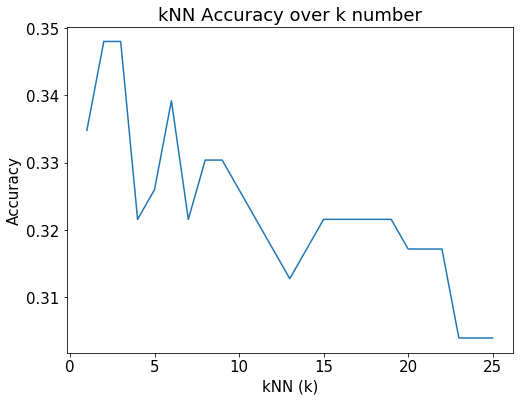

In [50]:
plot_knn_accuracy(X_train, y_train, '13', params)

### Final Prediction

In [51]:
y_pred = fit.predict(X_test)

score = metrics.accuracy_score(y_test,y_pred)

overall_scores['KNeighborsClassifier with 0 Values test_set'] = score

print(f"Accuracy Score: {score}")

Accuracy Score: 0.3157894736842105


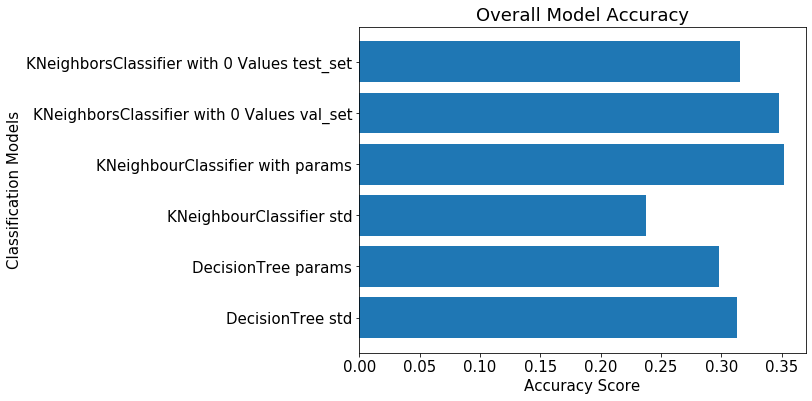

In [52]:
plt.figure(figsize=(8,6))

plt.barh(range(len(overall_scores)), overall_scores.values(), align='center')
plt.yticks(range(len(overall_scores)), list(overall_scores.keys()))

plt.title('Overall Model Accuracy')
plt.xlabel('Accuracy Score')
plt.ylabel('Classification Models')

plt.savefig('images/figure14.png', bbox_inches='tight')
plt.show()

#### [Return to top](#top)